In [1]:
import random
random.seed(1000)
import matplotlib.pyplot as plt

# Create Data

In [2]:
# number of elements in list
n = 50

# list of unsorted items
items = [int(random.random()*n) for _ in range(n)]

# value to be searched in list
value = int(random.random()*n)

# sorted list 
sorted_items = sorted(items)

# Find Value in Unsorted List with Linear Search

Animation: https://yongdanielliang.github.io/animation/web/LinearSearchNew.html

In [3]:
def get_item(items, index):
    """value of of an item in a list based on the index of the value
        args:
            - items: List of items
            - index: index of the requested item
        return:
            - value of the requested item
    """
    if index == -1:
        print("Not in the list")
        return None
    else:
        return items[index] 

In [4]:
def find_element(items, value):
    """Linear search for a value in a list of items
        args:
            - items: unsorted list of items
            - value: searched value
        return:
            - index of value or -1 if not in list
    """
    for i, item in enumerate(items):
        if items == value:
            return i
        else:
            return -1

In [6]:
index = find_element(items,value)
print(index)

-1


In [7]:
print(value)
get_item(items, index)

14
Not in the list


### Question: 
* Time your function with differently sized inputs by
* searching for each input size for a non-existing element
* and plot the change of the time to the size of the input

(see 1 Timing Algorithms)

In [12]:
import time as timer

In [8]:
%%timeit
index = find_element(items, value)

365 ns ± 9.73 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [27]:
list_of_n = [10, 50, 100, 200, 300, 400, 600, 800]

341 ns ± 17.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
393 ns ± 44.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
366 ns ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
393 ns ± 38.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
348 ns ± 20.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
337 ns ± 7.23 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
354 ns ± 32.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
387 ns ± 51.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


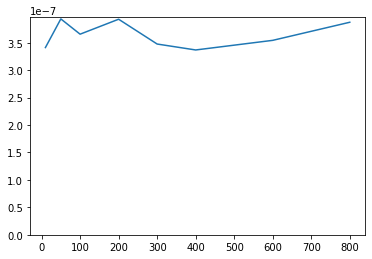

In [28]:
measures = []
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o find_element(items,value)
    measures.append((n, time.average))

plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()

### Question: What is the time complexity of searching for a value in an unsorted list?

Big O Notation

- The time of search for a value in an unsorted list is O(n) - linear. The time to search will increase as the size of input increases

# Find Value in Sorted list with Binary Search

Animation: https://yongdanielliang.github.io/animation/web/BinarySearchNew.html

In [19]:
def find_sorted(items, value):
    """Bineary search for a value in a list of sorted items
        args:
            - items: sorted list of items
            - value: searched value
        return:
            - index of value or -1 if not in list
    """
    n = len(items)
    left = 0
    right = n - 1
    try:
        while left <= right:
            middle = (left + right) // 2
            if value < items[middle]:
                right = middle - 1
            elif value > items[middle]:
                left = middle + 1
            else:
                return middle
    #raise ValueError('Value is not in the list')
    
    except:
        return -1

In [20]:
# a value that is not in the list so that we get the worst case time
value = n+1 
find_sorted(sorted_items, value)

In [21]:
n = 100
items = [int(random.random()*n) for _ in range(n)]
value = n+1 
find_sorted(sorted_items, value)

In [22]:
list_of_n = [10, 50, 100, 200, 300, 400, 600, 800]
items = [int(random.random()*n) for _ in range(n)]
value = n+1 
find_sorted(sorted_items, value)

### Question: 
* Time your function with differently sized inputs by
* searching for each input size for a non-existing element
* and plot the change of the time to the size of the input

(see 1 Timing Algorithms)

In [23]:
%%timeit
find_sorted(items, value)

1.47 µs ± 46.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


906 ns ± 34 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.25 µs ± 37.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.39 µs ± 24 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.34 µs ± 33.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.52 µs ± 3.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.37 µs ± 9.06 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.44 µs ± 5.65 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.37 µs ± 15.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


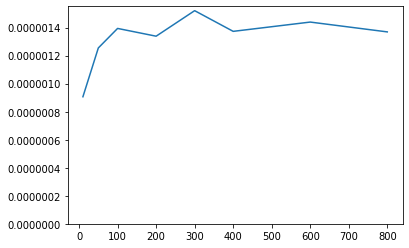

In [24]:
measures = []
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o find_sorted(items,value)
    measures.append((n, time.average))

plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()

### Question: What is the time complexity of binary search? 

Big O Notation

- The time complexity of binary search is Logarithmic Time — O(log n)

An algorithm is said to have a logarithmic time complexity when it reduces the size of the input data in each step (it don’t need to look at all values of the input data